<a href="https://colab.research.google.com/github/RoshanJamthe/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type (whether movie or tv show) is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# <b><u> Exploratory Data Analysis

##Dataset Loading and viewing

In [1]:
# EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset loading
netflix_data = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone project/Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
# View the data
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Get feature info
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Data Visualization

### Out of Movies and Tv shows, Which are more in number?

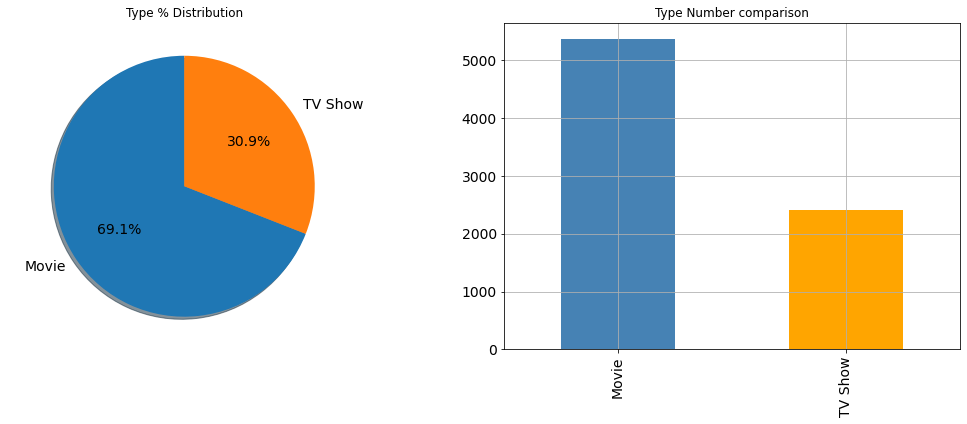

In [69]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
netflix_data['type'].value_counts().plot(kind='pie',fontsize=14, autopct='%1.1f%%',shadow=True, startangle=90,label= " ",title='Type % Distribution') # Get the pie plot

plt.subplot(1,2,2)
netflix_data['type'].value_counts().plot(kind='bar',title='Type Number comparison',fontsize=14,grid=True,color=['steelblue','orange']) # Get the bar plot
plt.show()

#### <u>Inference:</u> Movies on Netflix are more than twice in number than TV shows.

### Trend of number of movies/tv shows after 2010

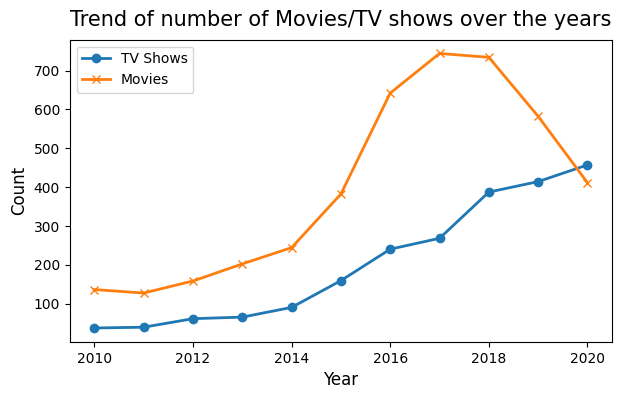

In [72]:
# Ignoring the year 2021 for the plot
fig, ax = plt.subplots(figsize=(7, 4), dpi=100) # Using suplots to get both lineplots in same figure
ax.plot(netflix_data[(netflix_data['type']=='TV Show') & (netflix_data['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1], marker='o',linewidth=2,label='TV Shows') # Trend of tv shows
ax.plot(netflix_data[(netflix_data['type']=='Movie')& (netflix_data['release_year']>=2010)][['release_year','type']].groupby('release_year').count()[:-1], marker='x',linewidth=2,label='Movies') # Trend of movies
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.set_title('Trend of number of Movies/TV shows over the years',fontsize=15,pad=10)
ax.legend()
plt.show()

#### <u>Inference:</u> It is clear from the plot that since past couple of years the focus from the Movies has been shifted towards TV shows.

### Top 10 Most active Directors

In [190]:
director_data = [] # Get all the occurences of directors in cast feature in this list
for string in netflix_data[~netflix_data['director'].isna()]['director'].tolist():
  temp = string.split(',')
  for director in temp:
    director_data.append(director.strip())

In [191]:
director_df = pd.Series(director_data) # Create a series using actor_data list

In [192]:
director_df.value_counts() # Get the value_counts of actors

Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
                       ..
Sajid Khan              1
Lucy van Beek           1
Remi Weekes             1
Jennifer Lynch          1
Mozez Singh             1
Length: 4478, dtype: int64

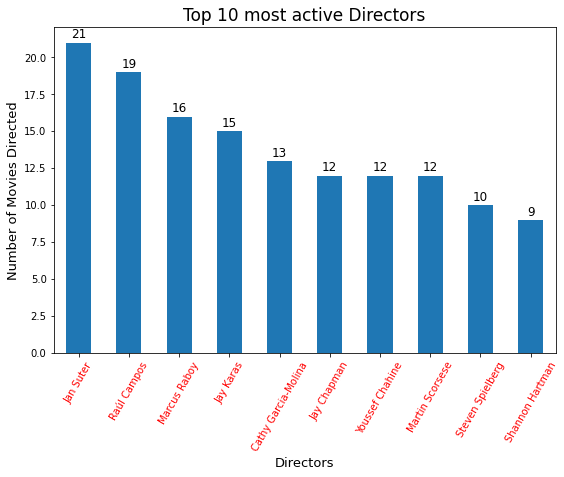

In [193]:
plt.figure(figsize=(9,6))
plots = director_df.value_counts()[:10].plot(kind='bar',animated=True)
plt.xlabel('Directors',fontsize=13)
plt.xticks(rotation=60,color='red')

plt.ylabel('Number of Movies Directed',fontsize=13)
plt.title('Top 10 most active Directors',fontsize=17)

# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

#### <u>Inference:</u>Jan Suter is the most featured director. 

### Top 10 countries based on content count

In [174]:
country_data = [] # Get all the occurences of countries in country feature in this list
for string in netflix_data[~netflix_data['country'].isna()]['country'].tolist():
  temp = string.split(',')
  for country in temp:
    country_data.append(country.lstrip())

In [175]:
country_df = pd.Series(country_data) # Create a series using actor_data list

In [176]:
country_df.value_counts() # Get the value_counts of actors

United States     3297
India              990
United Kingdom     723
Canada             412
France             349
                  ... 
Samoa                1
Azerbaijan           1
Bermuda              1
Ecuador              1
Montenegro           1
Length: 118, dtype: int64

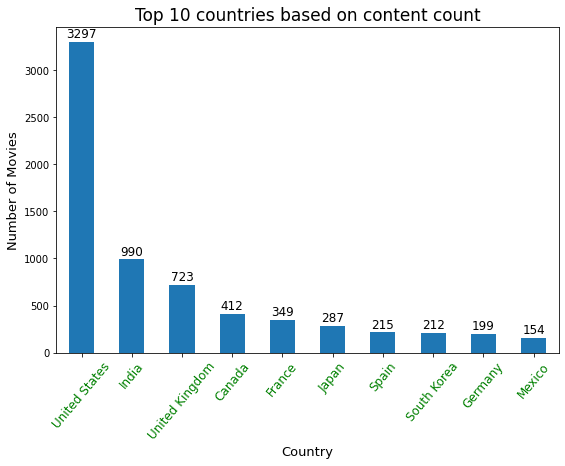

In [177]:
plt.figure(figsize=(9,6))
plots = country_df.value_counts()[:10].plot(kind='bar',animated=True)
plt.xlabel('Country',fontsize=13)
plt.xticks(rotation=50,color='Green',size=12)

plt.ylabel('Number of Movies',fontsize=13)
plt.title('Top 10 countries based on content count',fontsize=17)

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

#### <u>Inference:</u> United States contributes most content to Netflix, second is India followed by United Kingdom. The 10 countries shown in the plot are the future market of Netflix.

### Get movie duration distribution

In [103]:
# Create a new dataframe for the analysis
duration = netflix_data[['type','duration']].copy()
duration.head()

,type,duration
0,TV Show,4 Seasons
1,Movie,93 min
2,Movie,78 min
3,Movie,80 min
4,Movie,123 min


In [105]:
duration['length']=duration['duration'].apply(lambda x: x.split(" ")[0]) # Get length of seasons and movie duration

In [106]:
duration.head() # Check the change

,type,duration,length
0,TV Show,4 Seasons,4
1,Movie,93 min,93
2,Movie,78 min,78
3,Movie,80 min,80
4,Movie,123 min,123


Text(0.5, 1.0, 'TV show seasons Distribution')

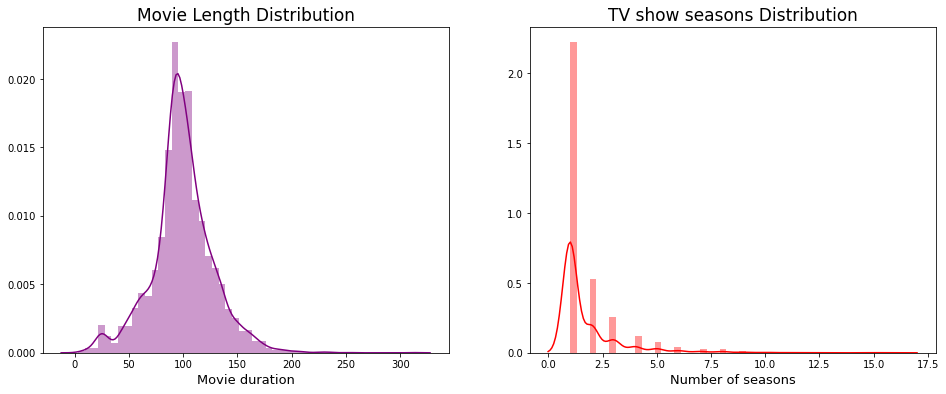

In [112]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(duration[duration['type']=='Movie']['length'],hist=True,color='purple')
plt.ylabel('',fontsize=13)
plt.xlabel('Movie duration',fontsize=13)
plt.title('Movie Length Distribution',fontsize=17)

plt.subplot(1,2,2)
sns.distplot(duration[duration['type']=='TV Show']['length'],hist=True,color='red')
plt.ylabel('',fontsize=13)
plt.xlabel('Number of seasons',fontsize=13)
plt.title('TV show seasons Distribution',fontsize=17)

#### <u>Inference</u>: Most movies are of length ~90 mins, there are some rare movies of length ~300 mins i.e 5 hours. Most TV Shows have only one season, there are TV shows having more than 10 seasons. 


### Get rating distribution

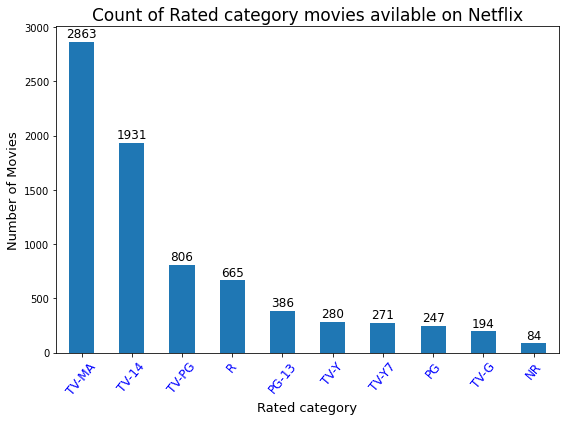

In [113]:
plt.figure(figsize=(9,6))
plots = netflix_data['rating'].value_counts()[:10].plot(kind='bar',animated=True)
plt.xlabel('Rated category',fontsize=13)
plt.xticks(rotation=50,color='blue',size=12)

plt.ylabel('Number of Movies',fontsize=13)
plt.title('Count of Rated category movies avilable on Netflix',fontsize=17)

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

#### <u>Inference</u>: Most number of movies are for age 17 and above, there are very few movies which are not rated. 

### Most active actor

In [117]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [182]:
actor_data = [] # Get all the occurences of actors in cast feature in this list
for string in netflix_data[~netflix_data['cast'].isna()]['cast'].tolist():
  temp = string.split(',')
  for actor in temp:
    actor_data.append(actor.strip())

In [183]:
actor_df = pd.Series(actor_data) # Create a series using actor_data list

In [184]:
actor_df.value_counts() # Get the value_counts of actors

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

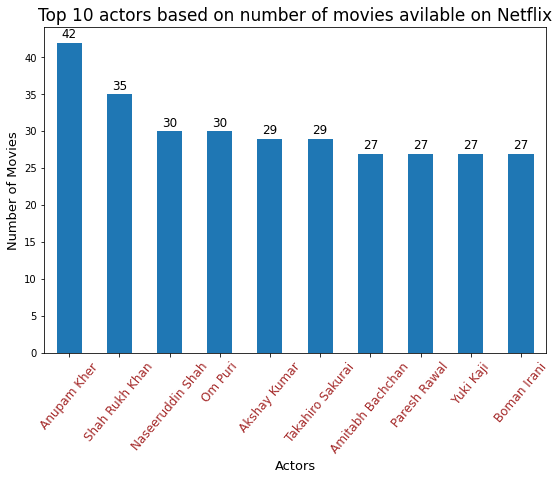

In [185]:
plt.figure(figsize=(9,6))
plots = actor_df.value_counts()[:10].plot(kind='bar')
plt.xlabel('Actors',fontsize=13)
plt.xticks(rotation=50,color='brown',size=12)

plt.ylabel('Number of Movies',fontsize=13)
plt.title('Top 10 actors based on number of movies avilable on Netflix',fontsize=17)

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

#### <u>Inference</u>: Most featured actor is Anupam Kher. Out of top 10 actors, 8 are Indians. It shows the impact of Indian actors on the World cinema

### Get top 10 genres

In [186]:
genre_data = [] # Get all the occurences of genres in listed_in feature in this list
for string in netflix_data['listed_in'].tolist():
  temp = string.split(',')
  for genre in temp:
    genre_data.append(genre.strip()) # stripping the genre of the leading whitespaces

In [187]:
genre_df = pd.Series(genre_data) # Create a series using actor_data list

In [188]:
genre_df.value_counts()[:15]

International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  525
Thrillers                    491
Crime TV Shows               427
Kids' TV                     414
Docuseries                   353
dtype: int64

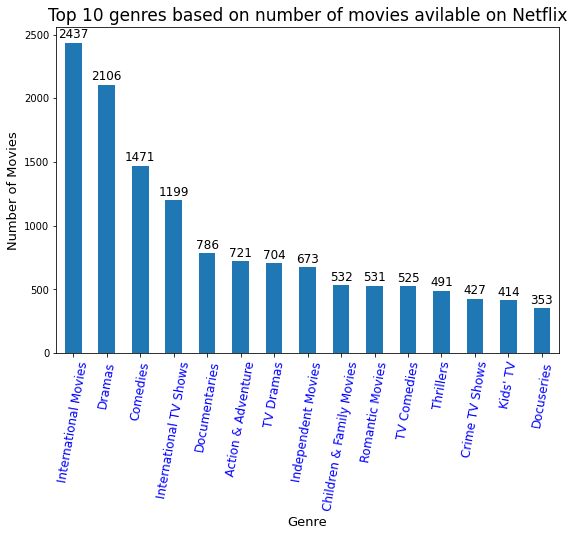

In [189]:
plt.figure(figsize=(9,6))
plots = genre_df.value_counts()[:15].plot(kind='bar')
plt.xlabel('Genre',fontsize=13)
plt.xticks(rotation=80,color='blue',size=12)

plt.ylabel('Number of Movies',fontsize=13)
plt.title('Top 10 genres based on number of movies avilable on Netflix',fontsize=17)

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

#### <u>Inference</u>: International movies is the top genre followed by Dramas and Comedies.

### Type - Country relationship, Understanding what type (whether movie or tv show) is available in different countries 

In [160]:
netflix_data['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       nan, 'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, Unit

In [173]:
netflix_data[['type','country']].value_counts()[-600:]

type     country                                            
Movie    United Kingdom, Nigeria                                2
         United States, Germany, Canada                         2
         United Kingdom, Italy                                  2
         United States, Greece                                  2
         United Kingdom, India, United States                   2
                                                               ..
         Argentina, Brazil, France, Poland, Germany, Denmark    1
         Thailand, China, United States                         1
         Thailand, Canada, United States                        1
         France, Canada, United States                          1
TV Show  Uruguay, Germany                                       1
Length: 600, dtype: int64

In [158]:
country_type = netflix_data[['show_id','type','country']].groupby(['country','type']).count()
country_type.head()

show_id
country                                            type            
Argentina                                          Movie         34
                                                   TV Show       16
Argentina, Brazil, France, Poland, Germany, Den... Movie          1
Argentina, Chile                                   Movie          1
Argentina, Chile, Peru                             Movie          1

In [166]:
# Using pivot function to create a table of index = country, columns = type, values = show_id
country_type_pivoted = country_type.pivot('country', 'type', 'show_id')
country_type_pivoted

KeyError: ignored

In [ ]:
plt.figure(figsize=(9,6))
plots = netflix_data['country'].value_counts()[:10].plot(kind='bar',animated=True)
plt.xlabel('Country',fontsize=13)
plt.xticks(rotation=50,color='Green',size=12)

plt.ylabel('Number of Movies',fontsize=13)
plt.title('Top 10 countries based on content count',fontsize=17)

# Iterrating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

In [98]:
# View the data
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
